In [4]:
# ========================
# Hotel Booking EDA & Data Cleaning Project
# ========================

# --- Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report ---

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# If missingno is not installed, install it:
try:
    import missingno as msno
except ImportError:
    !pip install missingno
    import missingno as msno

In [5]:
import pandas as pd
df = pd.read_csv('hotel_bookings.csv')

In [6]:
# Step 3: Load Data
df = pd.read_csv('hotel_bookings.csv')

In [7]:
# Step 4: Summary Statistics
print("-" * 30)
print("DataFrame Info:")
df.info()
print("-" * 30)
print("Summary Statistics:")
display(df.describe())


------------------------------
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                         

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


------------------------------
Missing Values per Column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0

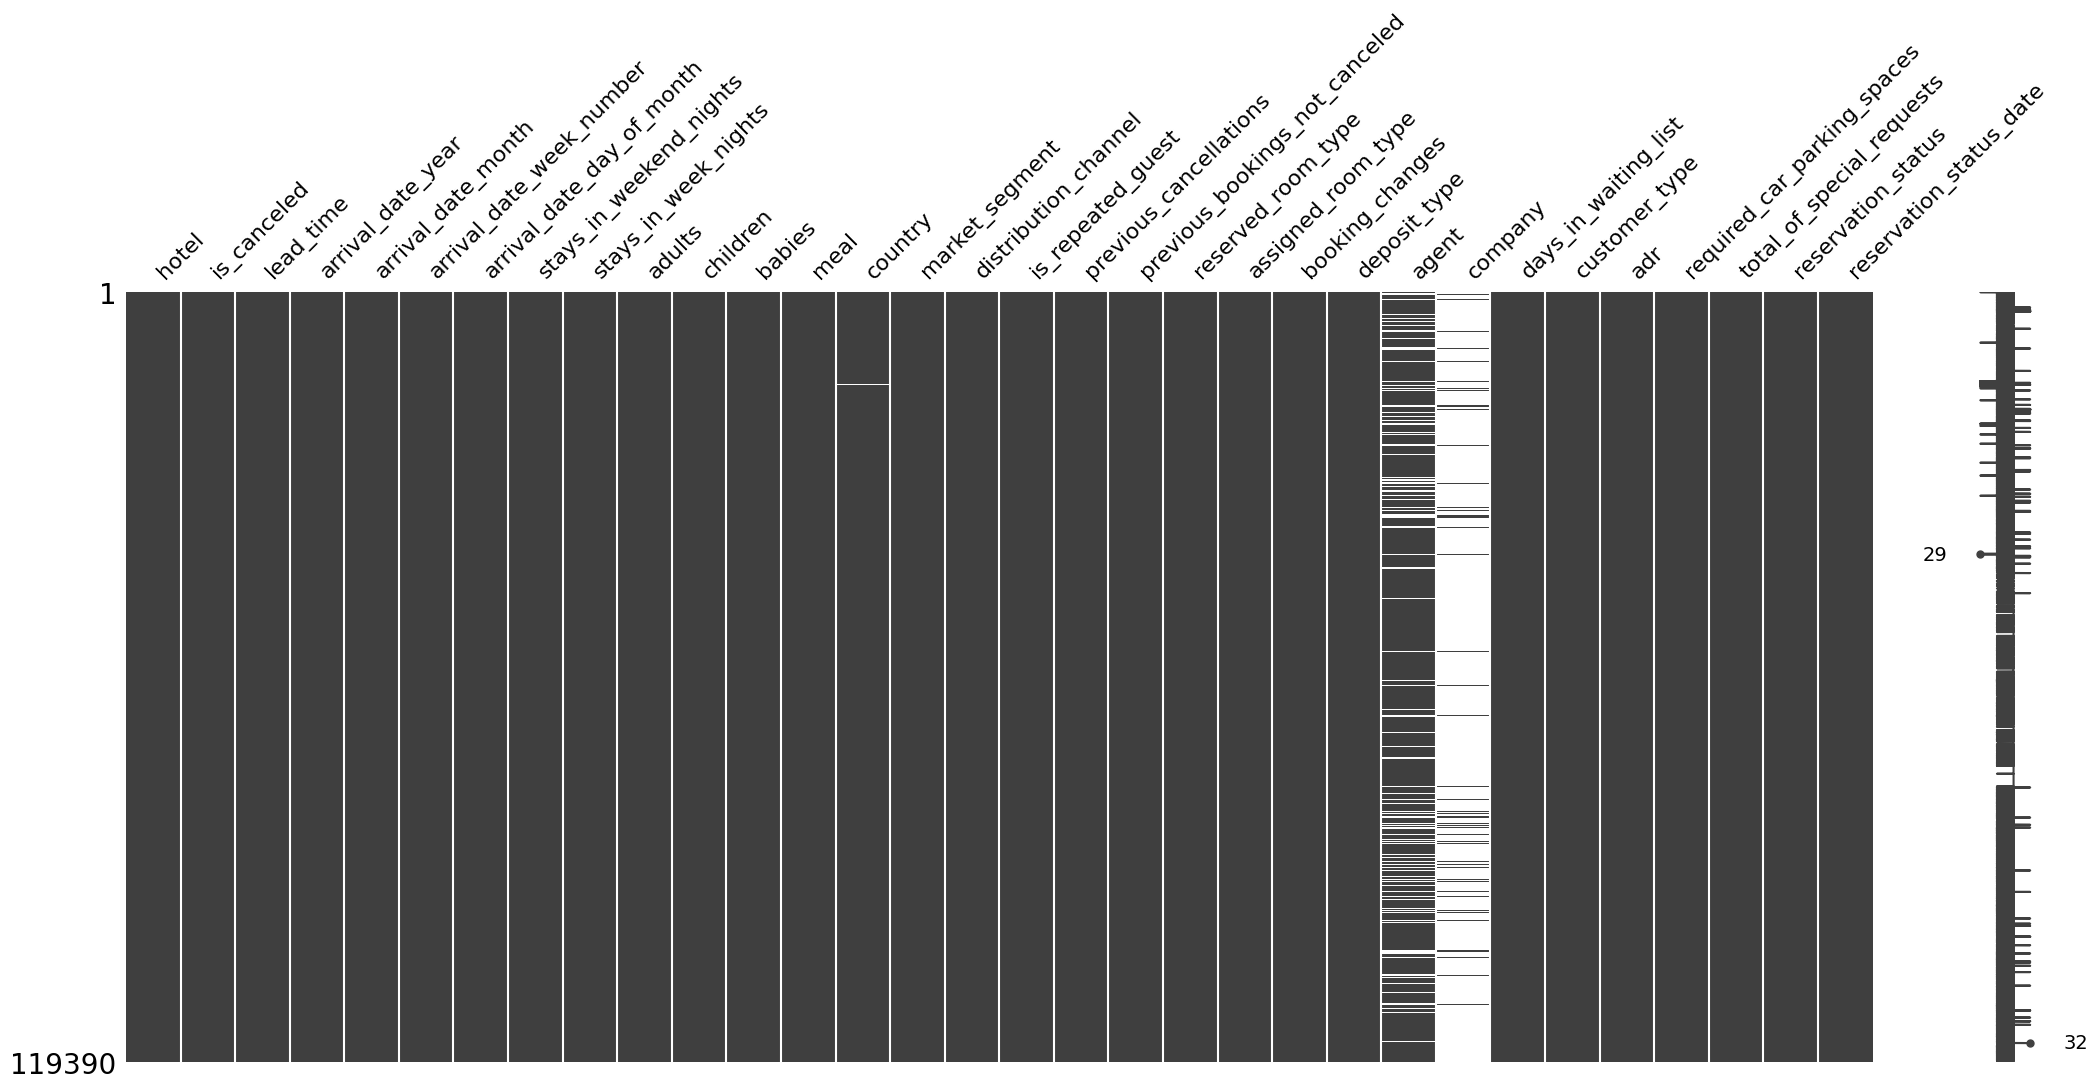

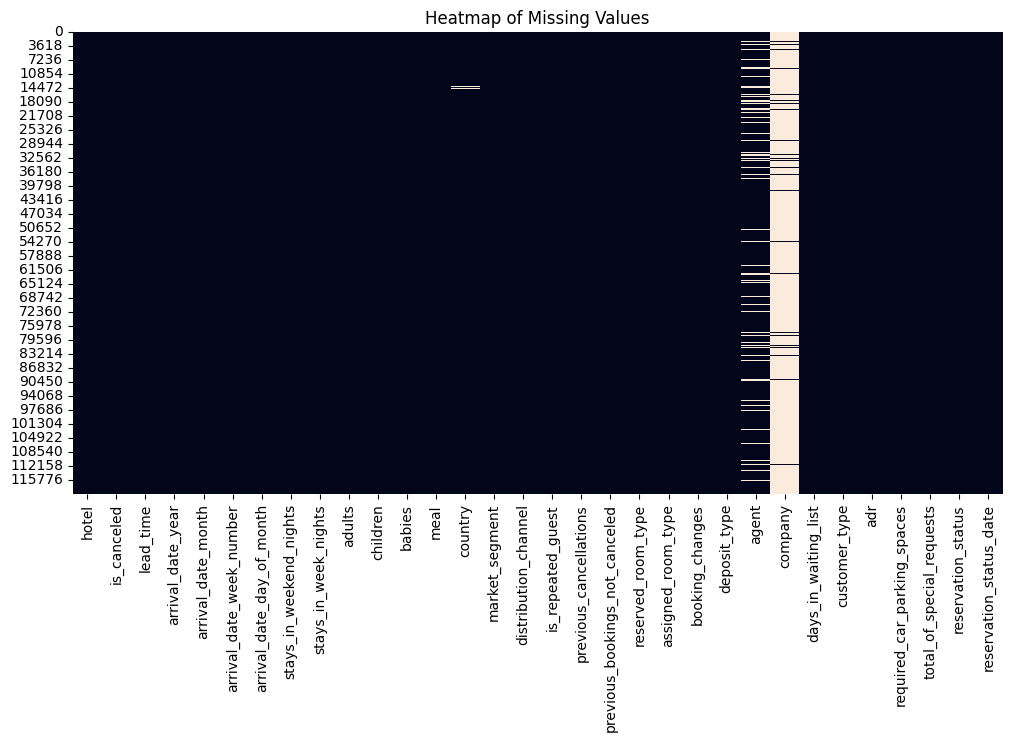

In [8]:
# Step 5: Check Missing Values
print("-" * 30)
print("Missing Values per Column:")
print(df.isnull().sum())

# Visualize missing data pattern
msno.matrix(df)
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Heatmap of Missing Values")
plt.show()


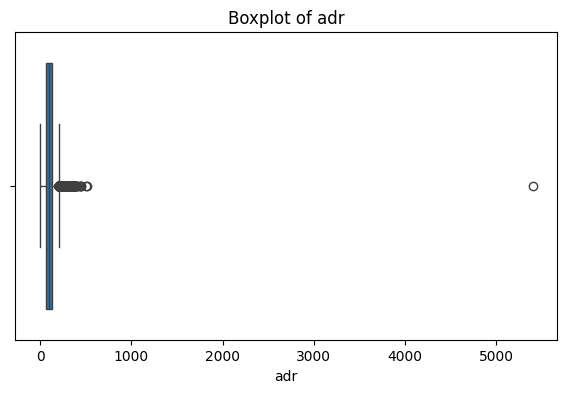

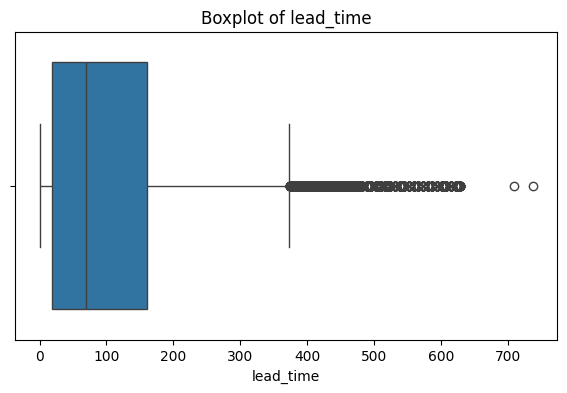

adr outliers: 3793 rows


In [9]:
# Step 6: Outlier Detection (Example for 'adr' and 'lead_time')
plt.figure(figsize=(7,4))
sns.boxplot(x=df['adr'])
plt.title('Boxplot of adr')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x=df['lead_time'])
plt.title('Boxplot of lead_time')
plt.show()

# IQR method for outliers (Example: 'adr')
Q1_adr = df['adr'].quantile(0.25)
Q3_adr = df['adr'].quantile(0.75)
IQR_adr = Q3_adr - Q1_adr
outliers_adr = df[(df['adr'] < Q1_adr - 1.5 * IQR_adr) | (df['adr'] > Q3_adr + 1.5 * IQR_adr)]
print(f"adr outliers: {outliers_adr.shape[0]} rows")

In [10]:
# --- Phase 2: Data Cleaning ---

# Handle Missing Values
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['children'] = df['children'].fillna(df['children'].median())

# Remove Duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

# Cap outliers in 'adr' above 1000
df.loc[df['adr'] > 1000, 'adr'] = 1000

# Ensure date columns are correctly formatted
if 'reservation_status_date' in df.columns:
    df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

Removed 32013 duplicate rows.


In [11]:
# --- Phase 3: Feature Engineering & Preprocessing ---

# Create new features
if {'adults','children','babies'}.issubset(df.columns):
    df['total_guests'] = df['adults'] + df['children'] + df['babies']
if {'stays_in_weekend_nights','stays_in_week_nights'}.issubset(df.columns):
    df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

df['is_family'] = np.where((df['children'] + df['babies']) > 0, "Yes", "No")

# Encode categorical variables
# One-Hot Encoding for low-cardinality columns
low_cardinality = [col for col in ['meal','market_segment'] if col in df.columns]
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

# Encode high-cardinality features (e.g. "country") with frequency encoding or group rare values
if 'country' in df.columns:
    country_freq = df['country'].value_counts(normalize=True)
    # Group countries with <1% frequency as "Other"
    df['country'] = df['country'].apply(lambda x: x if country_freq[x] > 0.01 else 'Other')

# Drop columns to avoid data leakage
leakage_cols = [col for col in ['reservation_status', 'reservation_status_date'] if col in df.columns]
df.drop(columns=leakage_cols, inplace=True, errors='ignore')

# --- Final Preparation: Split into Train/Test Sets ---

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
print(f"Training set: {train.shape}, Testing set: {test.shape}")

# --- Optional: Save Processed Files for Upload ---
train.to_csv('hotel_bookings_clean_train.csv', index=False)
test.to_csv('hotel_bookings_clean_test.csv', index=False)
df.to_csv('hotel_bookings_clean_full.csv', index=False)
print("Cleaned files ready to download and upload to GitHub.")

# For Colab: Download processed files to your local machine
files.download('hotel_bookings_clean_full.csv')
files.download('hotel_bookings_clean_train.csv')
files.download('hotel_bookings_clean_test.csv')

Training set: (69901, 42), Testing set: (17476, 42)
Cleaned files ready to download and upload to GitHub.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>